In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-05-12 11:10:17.634720: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 11:10:17.677913: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 11:10:17.678548: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 11:10:18.529529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:

len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

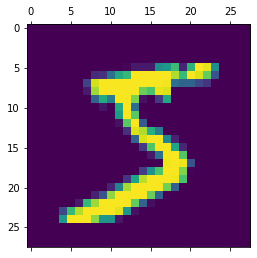

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="other/adam", histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2692 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1216 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0854 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0532 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0429 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0289 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0240 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [13]:
# %load_ext tensorboard
# %tensorboard --logdir files/fit

In [13]:
model.get_weights()

[array([[ 3.1155474e-02,  7.9021081e-02, -5.0606120e-02, ...,
         -2.3352563e-02,  3.2859966e-03,  5.2512065e-02],
        [ 2.9351816e-02,  5.9609741e-02, -6.7539938e-02, ...,
          2.6097305e-02,  6.2529027e-02,  2.2564165e-02],
        [ 3.8860515e-02,  8.4295571e-03, -6.6565134e-02, ...,
          1.1199065e-02, -6.2867478e-02, -7.1962431e-02],
        ...,
        [ 3.7499249e-02,  3.0073091e-02,  5.7854474e-02, ...,
          6.0570046e-02,  6.9128081e-02, -4.4660985e-02],
        [ 5.7435513e-02,  2.5706246e-02,  7.1194768e-02, ...,
         -3.7141144e-05, -5.9530139e-06, -6.9750547e-02],
        [-3.4218911e-02,  1.0130979e-02, -1.0473855e-02, ...,
          4.9356118e-02, -8.2003944e-02, -2.6952993e-02]], dtype=float32),
 array([-0.03944788,  0.06397914,  0.18128806, -0.06805717, -0.12201601,
         0.12027453,  0.10824723,  0.01463018,  0.08357939,  0.10541093,
         0.14666434,  0.01834219, -0.01123579,  0.13849661,  0.0101127 ,
        -0.04540332,  0.0278925